# IMAGE visualization 
Reference \
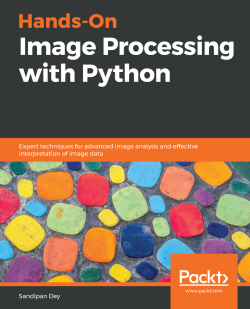

https://static.packt-cdn.com/products/9781789343731/cover/smaller

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/dtrad/geoml_course/blob/master/VisualizationImages.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

In this practice we will use different python libraries for image processing. Notice that we will often work with images in Geophysics for example, seismic sections.\
For Collab:
- Need to download files from github for the examples 
- Upload to collab
- !unzip images.zip -d images





## What is an image and how it is stored on a computer?
Conceptually, an image in its simplest form (single-channel; for example, binary or mono-chrome, grayscale or black and white images) is a two-dimensional function f(x,y) that maps a coordinate-pair to an integer/real value, which is related to the intensity/color of the point. Each point is called a pixel or pel (picture element). An image can have multiple channels too (for example, colored RGB images, where a color can be represented using three channels—red, green, and blue). For a colored RGB image, each pixel at the (x,y) coordinate can be represented by a three-tuple (rx,y, gx,y, bx,y).

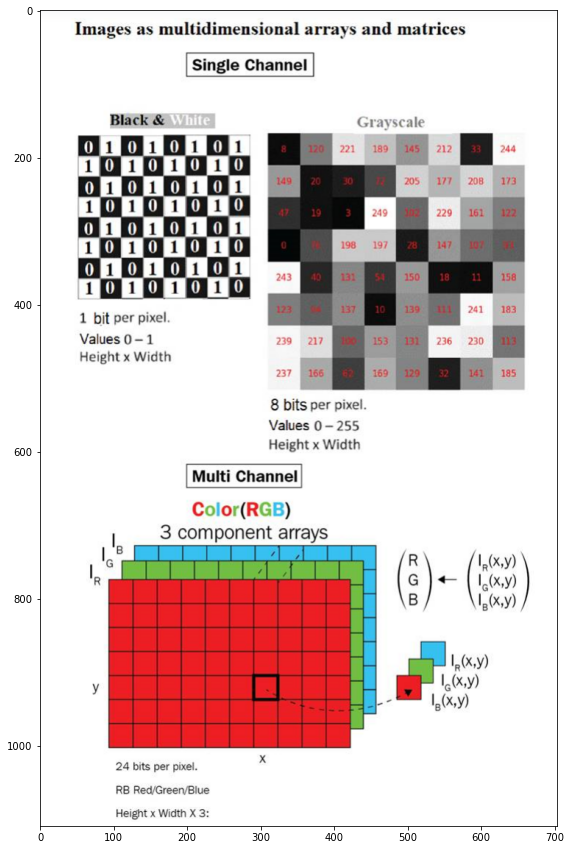

In [44]:
import matplotlib.image as mpimg
import matplotlib.pylab as plt
im = mpimg.imread("./images/imagesPython.png")
plt.figure(figsize=(15,15))
plt.imshow(im)

In Python, there are many libraries that we can use for image processing. Examples: NumPy, SciPy, scikit-image, PIL (Pillow), OpenCV, scikit-learn, SimpleITK, and Matplotlib.

In [45]:
# for inline image display inside notebook
# % matplotlib inline 
import numpy as np
from PIL import Image, ImageFont, ImageDraw
from PIL.ImageChops import add, subtract, multiply, difference, screen
import PIL.ImageStat as stat
from skimage.io import imread, imsave, imshow, show, imread_collection, imshow_collection
from skimage import color, viewer, exposure, img_as_float, data
from skimage.transform import SimilarityTransform, warp, swirl
from skimage.util import invert, random_noise, montage
import matplotlib.image as mpimg
import matplotlib.pylab as plt
import matplotlib.pyplot as plt2
from scipy.ndimage import affine_transform, zoom
from scipy import misc
print(plt2.get_backend())

/home/dtrad/anaconda3/envs/tfgpu3/lib/python3.8/site-packages/skimage/viewer/utils/__init__.py:1: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  from .core import *


module://ipykernel.pylab.backend_inline


## Different number of channels
* Single channel images—each pixel is represented by a single value:
    * Binary (monochrome) images (each pixel is represented by a single 0-1 bit)
    * Gray-level images (each pixel can be represented with 8-bits and can have values typically in the range of 0-255)
* Multi-channel images—each pixel is represented by a tuple of values:
    * 3-channel images; for example, the following:
    * RGB images—each pixel is represented by three-tuple (r, g, b) values, representing red, green, and blue channel color values for every pixel.
    * HSV images—each pixel is represented by three-tuple (h, s, v) values, representing hue (color), saturation (colorfulness—how much the color is mixed with white), and value (brightness—how much the color is mixed with black) channel color values for every pixel. The HSV model describes colors in a similar manner to how the human eye tends to perceive colors. 
    * Four-channel images; for example, RGBA images—each pixel is represented by three-tuple (r, g, b, α) values, the last channel representing the transparency.

In [46]:
im = Image.open("./images/parrot.png") # read the image, provide the correct path
print(im.width, im.height, im.mode, im.format, type(im))
print(im.info, im.size)
im.show() # display the image 

486 362 RGB PNG <class 'PIL.PngImagePlugin.PngImageFile'>
{'srgb': 0, 'gamma': 0.45455, 'dpi': (120, 120)} (486, 362)


In [47]:
im_g = im.convert('L')                         # convert the RGB color image to a grayscale image
print(type(im),type(im_g))
im_g.save('./images/parrot_gray.png')         # save the image to disk
Image.open("./images/parrot_gray.png").show() # read the grayscale image from disk and show

<class 'PIL.PngImagePlugin.PngImageFile'> <class 'PIL.Image.Image'>


Notice that collor images have 3 layers, gray images only one.
Let us read with matplotlib.image as numpy ndarray

In [48]:
imm = mpimg.imread("./images/parrot.png")
img = mpimg.imread("./images/parrot_gray.png")
print(imm.shape, img.shape)

(362, 486, 3) (362, 486)


Some pictures have a fourth layer, for example transparence $\alpha$

(362, 486, 4) float32 <class 'numpy.ndarray'>


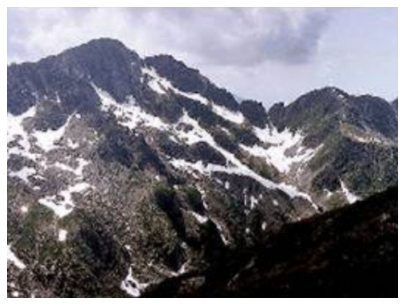

In [49]:
im = mpimg.imread("./images/hill.png")  # read the image from disk as a numpy ndarray
print(im.shape, im.dtype, type(im))      # this image contains an α channel (transparency), hence num_channels= 4
plt.figure(figsize=(7,7))
plt.imshow(im) # display the image
plt.axis('off')
plt.show()

In [50]:
print(im[100,100,:])
im1 = im.copy()

im1[im1 < 0.5] = 0    # make the image look darker
print(im1[100,100,:])

[0.38039216 0.39607844 0.5019608  1.        ]
[0.        0.        0.5019608 1.       ]


What happens if in the previous cell we do im1=im instead? What would you see below?

In [51]:
print(im[100,100,:])
print(im1[100,100,:])

[0.38039216 0.39607844 0.5019608  1.        ]
[0.        0.        0.5019608 1.       ]


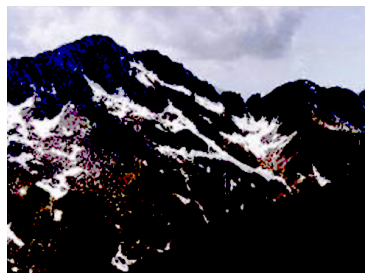

In [52]:
plt.imshow(im1)
plt.axis('off')
plt.tight_layout()

Many of these libraries have interpolation methods, but if you remember one only, you can save and reread with a different library:

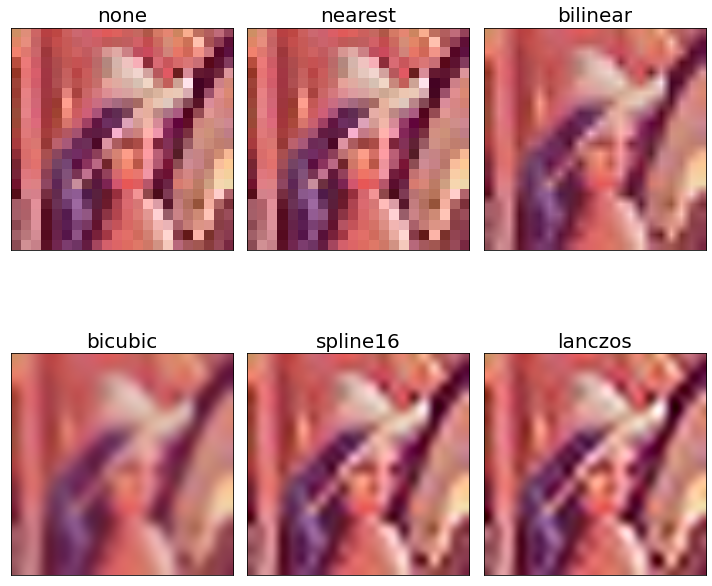

In [53]:
im = mpimg.imread("./images/lena_small.jpg") # read the image from disk as a numpy ndarray
methods = ['none', 'nearest', 'bilinear', 'bicubic', 'spline16', 'lanczos']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 10),subplot_kw={'xticks': [], 'yticks': []})
for ax, interp_method in zip(axes.flat, methods):
    ax.imshow(im, interpolation=interp_method)
    ax.set_title(str(interp_method), size=20)
plt.tight_layout()
plt.show()

Images can be encoded differently, for example, RGB (red, green, blue) vs HSV (Hue, Saturation, Value)

(362, 486, 3) uint8 <class 'numpy.ndarray'>
encoding RGB [ 79 103 189]
encoding HSV [0.63030303 0.58201058 0.74117647]


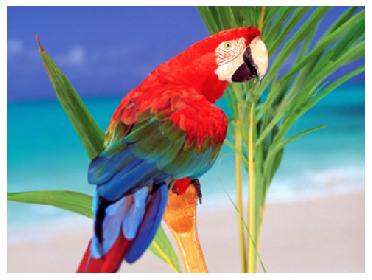

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


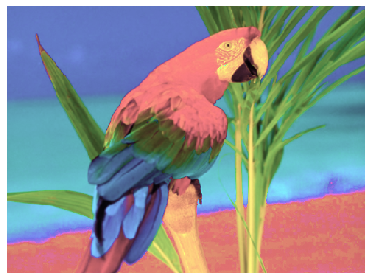

((0.0, 1.0, 0.0, 1.0), <matplotlib.image.AxesImage at 0x7f37ed7a02e0>, None)

In [54]:
im = imread("./images/parrot.png")     # read image from disk, provide the correct path
print(im.shape, im.dtype, type(im))
print('encoding RGB',im[100,100,:])
hsv = color.rgb2hsv(im) # from RGB to HSV color space
print('encoding HSV',hsv[100,100,:])
plt.axis('off'), imshow(im), show()
hsv[:, :, 1] = 0.5 # change the saturation
im1 = color.hsv2rgb(hsv) # from HSV back to RGB
imsave('./images/parrot_hsv.png', im1) # save image to disk
im = imread("./images/parrot_hsv.png")
plt.axis('off'), imshow(im), show()

In [55]:
im = Image.open("./images/parrot.png")
print(im.mode)
im.save("./images/parrot.jpg")

RGB


In [56]:
#!ls -lah ../images

Converting from one color space into another

<Figure size 432x288 with 0 Axes>

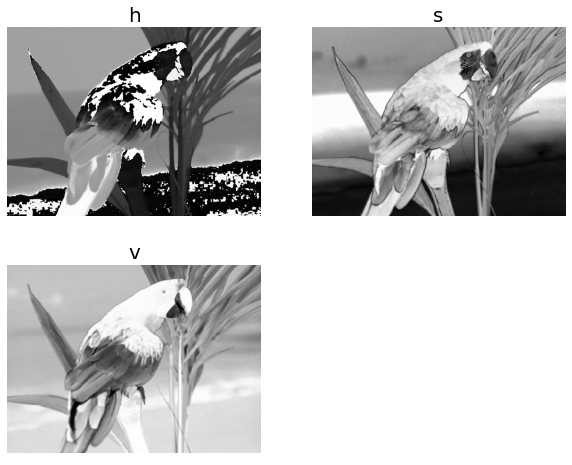

In [57]:
im = imread("./images/parrot.png")
im_hsv = color.rgb2hsv(im)
plt.gray()
plt.figure(figsize=(10,8))
plt.subplot(221), plt.imshow(im_hsv[...,0]), plt.title('h', size=20), plt.axis('off')
plt.subplot(222), plt.imshow(im_hsv[...,1]), plt.title('s', size=20), plt.axis('off')
plt.subplot(223), plt.imshow(im_hsv[...,2]), plt.title('v', size=20), plt.axis('off')
plt.subplot(224), plt.axis('off')
plt.show()

# Processing images

PIL uses the Image object to store an image, whereas scikit-image uses the numpy ndarray data structure to store the image data.\
Let us convert between these two data structures. Numpy can take a PIL image and convert it to numpy directly

<class 'PIL.PngImagePlugin.PngImageFile'>
<class 'numpy.ndarray'>


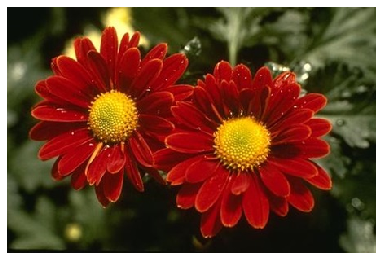

((-0.5, 452.5, 301.5, -0.5), None)

In [58]:
# Read using PIL, convert to numpy and save as scikit-image
im = Image.open('./images/flowers.png') # read image into an Image object with PIL
print(type(im))
im = np.array(im) # create a numpy ndarray from the Image object
print(type(im))
imshow(im) # use skimage imshow to display the image
plt.axis('off'), show()

Now the opposite, we read as numpy and convert to PIL

In [59]:
# Read using Scikit-image (numpy array) and save as Image structure
im = imread('./images/flowers.png') # read image into numpy ndarray with skimage
print(type(im))
im = Image.fromarray(im) # create a PIL Image object from the numpy ndarray
print(type(im))
im.show() # display the image with PIL Image.show() method

<class 'numpy.ndarray'>
<class 'PIL.Image.Image'>


## Manipulating numbers
Images can be edited as other matrices, in particular when we use numpy format. For example, let us add a mask to an image:

[180  76  83]


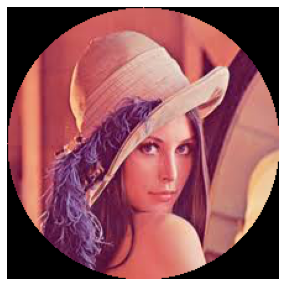

(<matplotlib.image.AxesImage at 0x7f37eda87fd0>,
 (-0.5, 219.5, 219.5, -0.5),
 None)

In [60]:
lena = mpimg.imread("./images/lena.jpg") # read the image from disk as a numpy ndarray
print(lena[0, 40])
# [180  76  83]
# print(lena[10:13, 20:23,0:1]) # slicing
lx, ly, _ = lena.shape
X, Y = np.ogrid[0:lx, 0:ly]
mask = (X - lx / 2) ** 2 + (Y - ly / 2) ** 2 > lx * ly / 4
lena2=lena.copy()
lena2[mask,:] = 0 # masks
plt.figure(figsize=(5,5))
plt.imshow(lena2), plt.axis('off'), plt.show()

## Merging two pictures
Since images are number, we can combine them for example with weighted averages

In [61]:
im1 = Image.open("./images/messi.png")
im1.save("./images/messi.jpg")
im1 = Image.open("./images/ronaldo.png")
im1.save("./images/ronaldo.jpg")

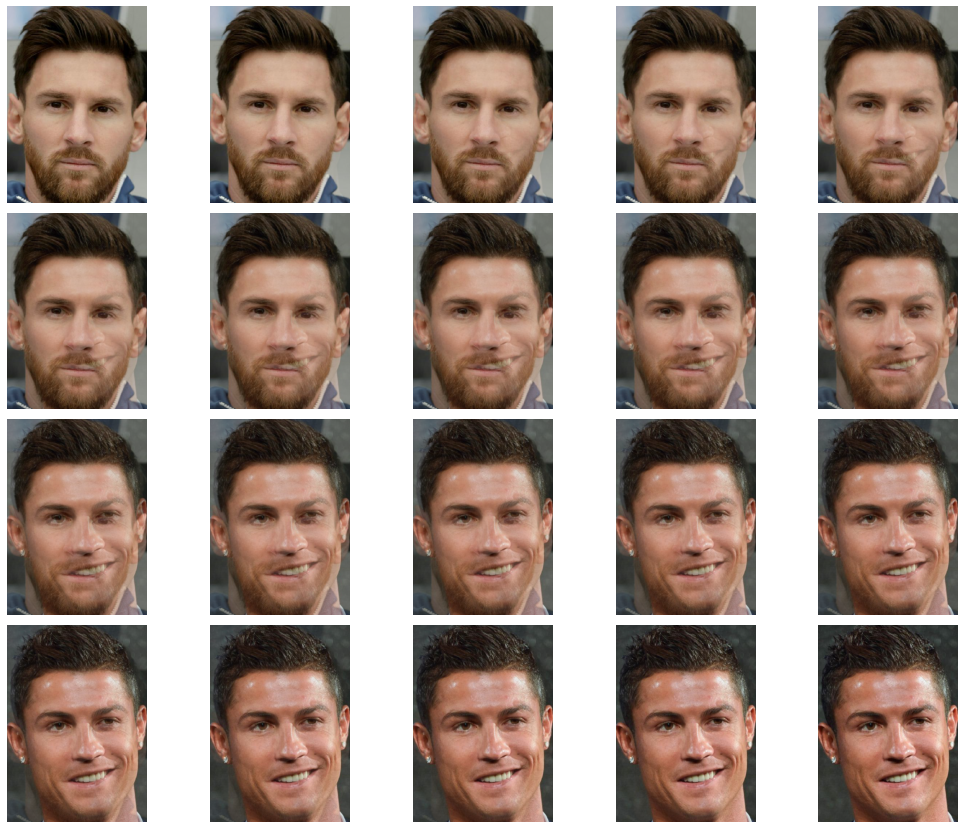

In [62]:
im1 = mpimg.imread("./images/messi.jpg") / 255 # scale RGB values in [0,1]
im2 = mpimg.imread("./images/ronaldo.jpg") / 255
i = 1
plt.figure(figsize=(18,15))
for alpha in np.linspace(0,1,20):
 plt.subplot(4,5,i)
 plt.imshow((1-alpha)*im1 + alpha*im2)
 plt.axis('off')
 i += 1
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()

## Resizing: 
This is one of the most common tasks we will need the image libraries for when we train images. \
Networks are usually created for a particular size so often we need to resize images. \
Also, often we need to do image augmentation to have more samples for training.

In [63]:
#% matplotlib inline # for inline image display inside notebook
# from PIL import Image
# from skimage.io import imread, imshow, show
# import scipy.fftpack as fp
# from scipy import ndimage, misc, signal
# from scipy.stats import signaltonoise
# from skimage import data, img_as_float
# from skimage.color import rgb2gray
from skimage.transform import rescale
# import matplotlib.pylab as pylab
# import numpy as np
import numpy.fft
import timeit

In [64]:
#ls ../images

In [65]:
im = Image.open("./images/vic.png")
print(im.width, im.height, type(im))
# 720 540
im.show()

720 540 <class 'PIL.PngImagePlugin.PngImageFile'>


In [66]:
imsmall=im.resize((128,128))
imsmall.show()

In [67]:
im2=imsmall.resize((720,540),Image.ANTIALIAS)
im2.show()

In [68]:
import scipy.stats as stats

In [69]:
im = Image.open("./images/tajmahal.jpg")
im.show()

In [70]:
import matplotlib.pylab as pylab

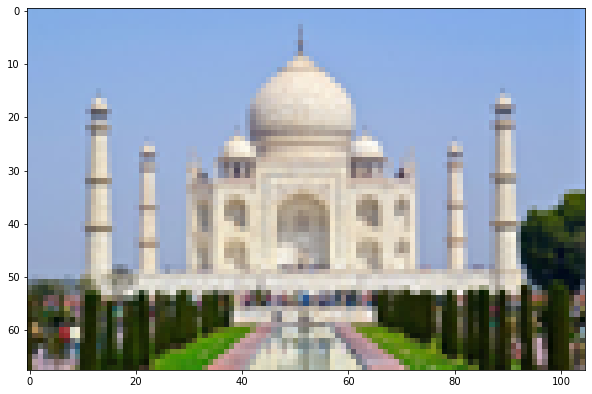

(<Figure size 720x504 with 1 Axes>,
 None)

In [71]:
im1 = im.resize((im.width//5, im.height//5))
pylab.figure(figsize=(10,7)), pylab.imshow(im1), pylab.show()

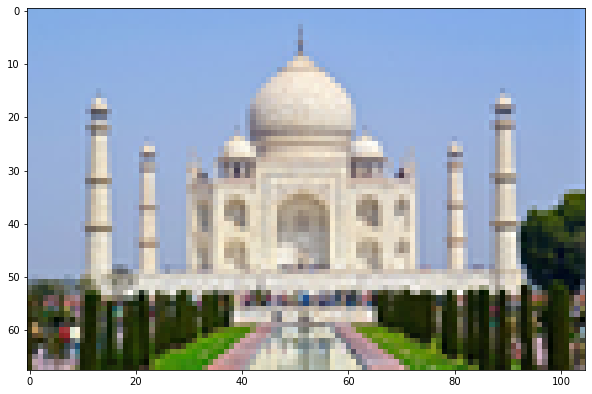

(<Figure size 720x504 with 1 Axes>,
 None)

In [72]:
im2 = im.resize((im.width//5, im.height//5), Image.ANTIALIAS)
pylab.figure(figsize=(10,7)), pylab.imshow(im2), pylab.show()

## Rescaling

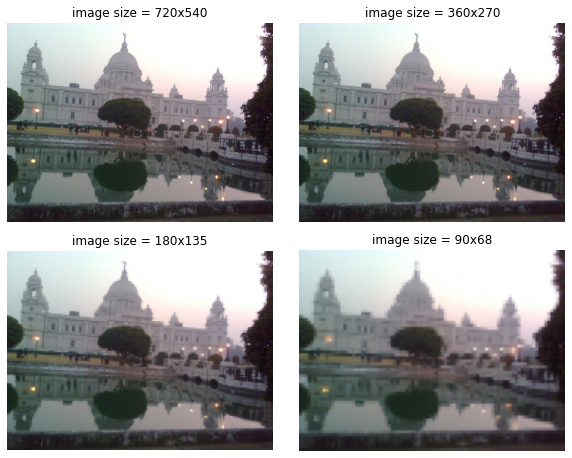

In [73]:
im = imread('./images/vic.png')
im1 = im.copy()
pylab.figure(figsize=(10,8))
for i in range(4):
    pylab.subplot(2,2,i+1), pylab.imshow(im1, cmap='gray'), pylab.axis('off')
    pylab.title('image size = ' + str(im1.shape[1]) + 'x' + str(im1.shape[0]))
    im1 = rescale(im1, scale = 0.5, multichannel=True, anti_aliasing=False)
pylab.subplots_adjust(wspace=0.1, hspace=0.1)
pylab.show()

# Other operations

In [74]:
# swirl: move in a twisting or spiraling pattern.
#swirl?

In [75]:
im = Image.open("./images/parrot.png") 
im.transpose(Image.FLIP_LEFT_RIGHT).show() # reflect about the vertical axis 

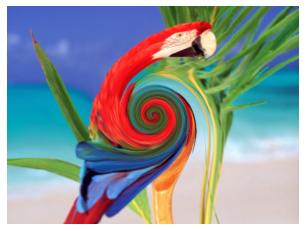

In [76]:
im = imread("./images/parrot.png")
swirled = swirl(im, rotation=0, strength=15, radius=200)
plt.imshow(swirled)
plt.axis('off')
plt.show()

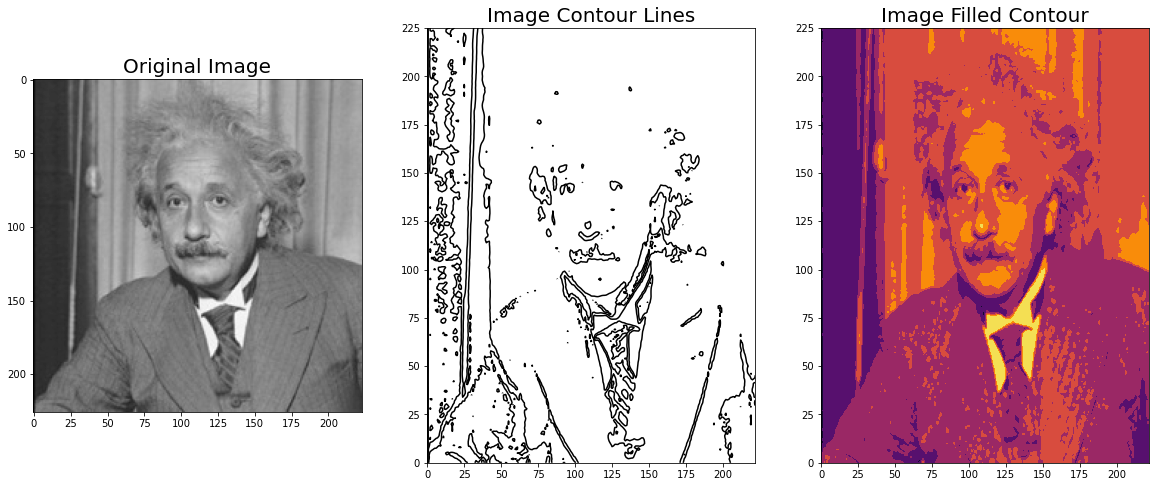

In [77]:
im = color.rgb2gray(imread("./images/einstein.jpg")) # read the image from disk as a numpy ndarray
plt.figure(figsize=(20,8))
plt.subplot(131), plt.imshow(im, cmap='gray'), plt.title('Original Image', size=20) 
plt.subplot(132), plt.contour(np.flipud(im), colors='k', levels=np.logspace(-15, 15, 100))
plt.title('Image Contour Lines', size=20)
plt.subplot(133), plt.title('Image Filled Contour', size=20), plt.contourf(np.flipud(im), cmap='inferno')
plt.show()

## clipping seismic

In [78]:
myfile="/home/dtrad/pythonexamples/MLprojects/semblance/cdp.3012b"

In [79]:
import numpy as np
nt=726
nx=48
dt=0.004
cdp = np.fromfile(myfile, dtype='float32')
cdp=cdp.reshape((nx,nt))
cdp=cdp.T
cdptime=np.arange(nt)*dt

731.6910156249997


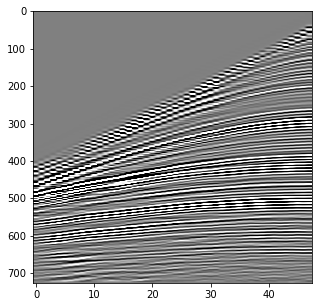

In [139]:
#fig, ax = plt.subplots(figsize=(8, 10),dpi=80)
#ax.imshow(np.random.rand(8, 90), interpolation='nearest')
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
pclip=90
mm=np.percentile(cdp,pclip);
print(mm)
plt.imshow(cdp,clim=[-mm,mm],aspect='auto')

## Vector Images
Definition:

Vector images are created using mathematical equations to define shapes and lines.
Images are composed of paths that connect points using geometric primitives like lines, curves, and shapes.
Scalability:

Vector images are resolution-independent. They can be resized without loss of quality because they are based on mathematical formulas rather than a fixed number of pixels.
Ideal for logos and illustrations that may need to be resized or scaled frequently.
Editing:

Vector graphics are easily editable, allowing for manipulation of individual elements (points, lines, and shapes).
Software like Adobe Illustrator and CorelDRAW is commonly used for creating and editing vector images.
Use Cases:

Logos, icons, diagrams, and illustrations that require scalability and the ability to maintain quality at various sizes are often created as vector graphics.
Vector images are commonly used in print design, signage, and professional illustrations.
Comparison:

Scalability:

Raster images may lose quality when resized.
Vector images can be scaled infinitely without loss of quality.
Editing:

Raster images are edited pixel by pixel and may lose quality during significant edits.
Vector images are edited by manipulating mathematical equations, allowing for easy modification of shapes and lines.
File Size:

Raster images can have larger file sizes, especially at high resolutions.
Vector images generally have smaller file sizes.
In summary, the choice between raster and vector images depends on the specific requirements of the project. Raster is suitable for detailed photographs, while vector is ideal for graphics that require scalability and precise editing.

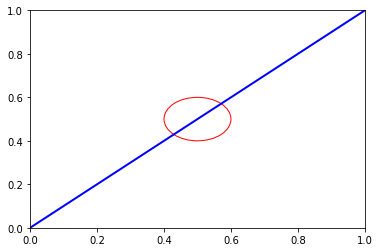

In [1]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots()

# Draw a line
ax.plot([0, 1], [0, 1], 'b-', linewidth=2)

# Draw a circle
circle = plt.Circle((0.5, 0.5), 0.1, color='r', fill=False)
ax.add_patch(circle)

# Set axis limits
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

# Display the plot
plt.show()
